In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
filename = "2018_data.csv"

# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

In [4]:
# Convert the csv file into a dataframe
crypto_data_2018_df = pd.read_csv(filename)
crypto_data_2018_df

,Unnamed: 0,btc_start_date,price_open,price_close,volume_traded,eth_start_date,price_open.1,price_close.1,volume_traded.1,ltc_start_date,...,price_close.6,volume_traded.6,dash_start_date,price_open.7,price_close.7,volume_traded.7,ada_start_date,price_open.8,price_close.8,volume_traded.8
0,0,2018-01-01T00:00:00.0000000Z,13971.1,10101.6,147606.21920,2018-01-01T00:00:00.0000000Z,744.39,1105.30,1379339.521,2018-01-01T00:00:00.0000000Z,...,393.93,102428.97600,2018-01-01T00:00:00.0000000Z,1027.191,689.500,61271.89094,2018-09-01T00:00:00.0000000Z,0.300000,0.085512,7.543098e+06
1,1,2018-02-01T00:00:00.0000000Z,10105.5,10310.0,311097.47520,2018-02-01T00:00:00.0000000Z,1105.30,850.10,1779320.569,2018-02-01T00:00:00.0000000Z,...,380.30,76193.44256,2018-02-01T00:00:00.0000000Z,689.500,582.368,44776.54752,2018-10-01T00:00:00.0000000Z,0.085500,0.069731,5.972341e+07
2,2,2018-03-01T00:00:00.0000000Z,10309.0,6911.1,364738.92010,2018-03-01T00:00:00.0000000Z,850.11,392.40,1917408.272,2018-03-01T00:00:00.0000000Z,...,184.13,50285.68862,2018-03-01T00:00:00.0000000Z,580.000,303.719,49763.21180,2018-11-01T00:00:00.0000000Z,0.069638,0.038600,1.265523e+08
3,3,2018-04-01T00:00:00.0000000Z,6913.8,9243.2,217398.70080,2018-04-01T00:00:00.0000000Z,393.25,669.57,1888070.603,2018-04-01T00:00:00.0000000Z,...,284.41,44602.21027,2018-04-01T00:00:00.0000000Z,303.809,473.475,38776.38426,2018-12-01T00:00:00.0000000Z,0.038637,0.040700,1.601121e+08
4,4,2018-05-01T00:00:00.0000000Z,9246.5,7485.6,133746.86690,2018-05-01T00:00:00.0000000Z,670.13,577.54,1531224.429,2018-05-01T00:00:00.0000000Z,...,239.43,91506.98776,2018-05-01T00:00:00.0000000Z,473.475,304.394,25859.24255,NaN,NaN,NaN,NaN
5,5,2018-06-01T00:00:00.0000000Z,7490.9,6387.9,120310.78780,2018-06-01T00:00:00.0000000Z,577.35,453.05,1667017.016,2018-06-01T00:00:00.0000000Z,...,170.67,27875.66694,2018-06-01T00:00:00.0000000Z,305.400,239.024,21546.51809,NaN,NaN,NaN,NaN
6,6,2018-07-01T00:00:00.0000000Z,6387.0,7726.0,124102.36790,2018-07-01T00:00:00.0000000Z,453.00,431.67,1095661.150,2018-07-01T00:00:00.0000000Z,...,209.23,56803.61617,2018-07-01T00:00:00.0000000Z,239.900,217.576,44737.57765,NaN,NaN,NaN,NaN
7,7,2018-08-01T00:00:00.0000000Z,7726.0,7015.8,149781.15990,2018-08-01T00:00:00.0000000Z,431.76,281.60,1413788.197,2018-08-01T00:00:00.0000000Z,...,150.01,59883.33471,2018-08-01T00:00:00.0000000Z,218.793,195.100,62024.40518,NaN,NaN,NaN,NaN
8,8,2018-09-01T00:00:00.0000000Z,7014.8,6604.1,120259.67690,2018-09-01T00:00:00.0000000Z,281.59,231.96,3099220.865,2018-09-01T00:00:00.0000000Z,...,129.87,51178.43574,2018-09-01T00:00:00.0000000Z,194.704,186.310,49986.45950,NaN,NaN,NaN,NaN
9,9,2018-10-01T00:00:00.0000000Z,6603.8,6307.5,80038.91905,2018-10-01T00:00:00.0000000Z,231.96,196.88,1443435.170,2018-10-01T00:00:00.0000000Z,...,115.16,39803.52398,2018-10-01T00:00:00.0000000Z,187.590,152.199,25417.59634,NaN,NaN,NaN,NaN


In [47]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2018 = crypto_data_2018_df['price_close'].pct_change().dropna()
btc_2018_df = pd.DataFrame(btc_2018)
btc_2018_df

,price_close
1,0.020630
2,-0.329670
3,0.337443
4,-0.190151
5,-0.146642
6,0.209474
7,-0.091923
8,-0.058682
9,-0.044911
10,-0.370686


In [48]:
eth_2018 = crypto_data_2018_df['price_close.1'].pct_change().dropna()
eth_2018_df = pd.DataFrame(eth_2018)
eth_2018_df

,price_close.1
1,-0.230888
2,-0.538407
3,0.706346
4,-0.137446
5,-0.215552
6,-0.047191
7,-0.347650
8,-0.176278
9,-0.151233
10,-0.432954


In [49]:
ltc_2018 = crypto_data_2018_df['price_close.2'].pct_change().pct_change().dropna()
ltc_2018_df = pd.DataFrame(ltc_2018)
ltc_2018_df

,price_close.2
2,-2.748933
3,-1.659277
4,-1.724557
5,0.543236
6,-0.909272
7,6.392485
8,-0.908362
9,8.805971
10,0.899432
11,-0.834804


In [50]:
usdt_2018 = crypto_data_2018_df['price_close.3'].pct_change().pct_change().dropna()
usdt_2018_df = pd.DataFrame(usdt_2018)
usdt_2018_df

,price_close.3
2,-1.178508
3,-2.114120
4,-1.498500
5,-1.000000
6,-inf
7,-3.573232
8,-2.885488
9,0.328046
10,0.674228
11,-2.974933


In [51]:
xlm_2018 = crypto_data_2018_df['price_close.4'].pct_change().pct_change().dropna()
xlm_2018_df = pd.DataFrame(xlm_2018)
xlm_2018_df

,price_close.4
2,-1.020821
3,-3.824607
4,-1.278443
5,0.174102
6,-2.227528
7,-1.434337
8,-1.863166
9,-1.825265
10,1.262586
11,-0.001857


In [52]:
xrp_2018 = crypto_data_2018_df['price_close.5'].pct_change().pct_change().dropna()
xrp_2018_df = pd.DataFrame(xrp_2018)
xrp_2018_df

,price_close.5
2,1.104071
3,-2.523303
4,-1.396591
5,-0.119677
6,-0.687089
7,2.142151
8,-4.182240
9,-1.306008
10,-0.090355
11,-0.851062


In [53]:
zec_2018 = crypto_data_2018_df['price_close.6'].pct_change().pct_change().dropna()
zec_2018_df = pd.DataFrame(zec_2018)
zec_2018_df

,price_close.6
2,13.908346
3,-2.055804
4,-1.290392
5,0.815861
6,-1.786724
7,-2.252751
8,-0.525654
9,-0.156346
10,1.738457
11,-0.008948


In [54]:
dash_2018 = crypto_data_2018_df['price_close.7'].pct_change().pct_change().dropna()
dash_2018_df = pd.DataFrame(dash_2018)
dash_2018_df

,price_close.7
2,2.079463
3,-2.168135
4,-1.638917
5,-0.398626
6,-0.582167
7,0.151232
8,-0.563862
9,3.063747
10,1.196248
11,-0.619416


In [55]:
ada_2018 = crypto_data_2018_df['price_close.8'].pct_change().pct_change().dropna()
ada_2018_df = pd.DataFrame(ada_2018)
ada_2018_df

,price_close.8
2,1.419133
3,-1.121861
4,-1.000000


In [56]:
# STEP 4: CALCULATE VARIANCE OF BITCOIN FOR DATAFRAME
"""

Will need: monthly_returns.var()

"""
btc_var_2018 = btc_2018.var()
print(btc_var_2018)

0.04316067911322884


In [57]:
eth_var_2018 = eth_2018.var()
print(eth_var_2018)

0.11236398859615726


In [58]:
ltc_var_2018 = ltc_2018.var()
print(ltc_var_2018)

14.3304720618554


In [59]:
usdt_var_2018 = usdt_2018.var()
print(usdt_var_2018)

nan


In [60]:
xlm_var_2018 = xlm_2018.var()
print(xlm_var_2018)

2.0284635863381655


In [61]:
xrp_var_2018 = xrp_2018.var()
print(xrp_var_2018)

3.142668039098049


In [62]:
zec_var_2018 = zec_2018.var()
print(zec_var_2018)

22.72854756260918


In [63]:
dash_var_2018 = dash_2018.var()
print(dash_var_2018)

2.6359887327905804


In [64]:
ada_var_2018 = ada_2018.var()
print(ada_var_2018)

2.053950648998553


In [65]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""
btc_2018_cov = btc_2018.cov(btc_2018)
btc_2018_cov

0.04316067911322885

In [66]:
eth_2018_cov = eth_2018.cov(btc_2018)
eth_2018_cov

0.05630031129305191

In [67]:
ltc_2018_cov = ltc_2018.cov(btc_2018)
ltc_2018_cov

-0.02300942183491934

In [68]:
usdt_2018_cov = usdt_2018.cov(btc_2018)
usdt_2018_cov

nan

In [69]:
xlm_2018_cov = xlm_2018.cov(btc_2018)
xlm_2018_cov

-0.25084341989876785

In [70]:
xrp_2018_cov = xrp_2018.cov(btc_2018)
xrp_2018_cov

-0.16376047874870922

In [71]:
zec_2018_cov = zec_2018.cov(btc_2018)
zec_2018_cov

-0.588063974384434

In [72]:
dash_2018_cov = dash_2018.cov(btc_2018)
dash_2018_cov

-0.18314324592526818

In [73]:
ada_2018_cov = ada_2018.cov(btc_2018)
ada_2018_cov

-0.3494898896678526

In [74]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2018 = btc_2018_cov / btc_var_2018
btc_beta_2018


1.0000000000000002

In [75]:
ada_beta_2018 = ada_2018_cov / btc_var_2018
ada_beta_2018

-8.097414054838938

In [76]:
ltc_beta_2018 = ltc_2018_cov / btc_var_2018
ltc_beta_2018

-0.5331107458841374

In [77]:
usdt_beta_2018 = usdt_2018_cov / btc_var_2018
usdt_beta_2018

nan

In [78]:
xlm_beta_2018 = xlm_2018_cov / btc_var_2018
xlm_beta_2018

-5.811850625443097

In [79]:
xrp_beta_2018 = xrp_2018_cov / btc_var_2018
xrp_beta_2018

-3.7942053302520042

In [80]:
zec_beta_2018 = zec_2018_cov / btc_var_2018
zec_beta_2018

-13.624993546595775

In [81]:
dash_beta_2018 = dash_2018_cov / btc_var_2018
dash_beta_2018

-4.243289255129778

In [82]:
ada_beta_2018 = ada_2018_cov / btc_var_2018
ada_beta_2018

-8.097414054838938

<AxesSubplot:>

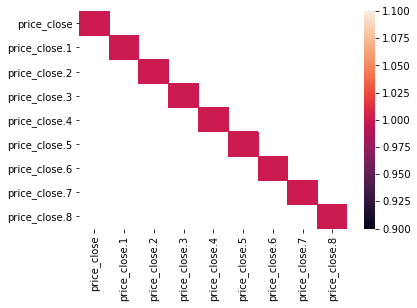

In [86]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
monthly_returns_2018_df = pd.concat(
    [btc_2018_df, eth_2018_df, ltc_2018_df, usdt_2018_df, xlm_2018_df, xrp_2018_df, zec_2018_df, dash_2018_df, ada_2018_df])
correlation = monthly_returns_2018_df.corr()
sns.heatmap(correlation)